<a href="https://colab.research.google.com/github/shahzadahmad7/SupervisedLearningAlgorithems/blob/main/K_NearestNeighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The K-Nearest Neighbors (KNN) algorithm is a simple yet powerful classification algorithm that can be used for both classification and regression tasks. It works by finding the K nearest data points in the training set to a given test data point and then predicts the label or value based on the labels or values of its neighbors.

Consider a telecom company that divided its clientele into four categories based on how each consumer used the services. If group participation can be predicted using demographic information, the business can tailor its offerings to each prospective consumer. A classification issue exists. To put it another way, we must create a model to be used to forecast the class of a new or unknown case given the dataset and established labels.

The example focuses on predicting usage patterns using demographic information, including area, age, and marital status.


The four possible values for the target field, custcat, which corresponds to the four customer categories, are as follows: 1st Level Service Two. E-Service Three-Plus Service 4- Complete Service

Our goal is to create a classifier that can identify the category of unidentified cases. We shall employ a particular categorization method known as K closest neighbour.


In [23]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from google.colab import files
%matplotlib inline

**Load the training data:** The algorithm starts by loading the training dataset, which consists of labeled examples with their corresponding features.

**Choose the number of neighbors (K):** The value of K represents the number of nearest neighbors to consider for classification or regression. It is a hyperparameter that needs to be defined prior to applying the algorithm.

**Calculate distances:** For a given test data point, the algorithm calculates the distance between that point and all other data points in the training set. The distance can be calculated using various metrics such as Euclidean distance or Manhattan distance.

**Find the K nearest neighbors:** The algorithm selects the K data points with the shortest distances to the test point.

**Make predictions:** For classification, the algorithm assigns the class label that is most common among the K nearest neighbors to the test point. For regression, the algorithm calculates the average or weighted average of the values of the K nearest neighbors and assigns it as the predicted value for the test point.

In [5]:
file=files.upload()

Saving TeleCust.csv to TeleCust.csv


In [7]:
df=pd.read_csv('TeleCust.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [8]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

In [9]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values
y = df['custcat'].values

In [13]:
ss = StandardScaler()
ss.fit(X).transform(X.astype(float))

array([[-0.02696767, -1.055125  ,  0.18450456, ..., -0.22207644,
        -1.03459817, -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243, ..., -0.22207644,
        -1.03459817,  2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601, ..., -0.22207644,
         0.96655883, -0.23065004],
       ...,
       [ 1.19883553,  1.47425216,  1.37948227, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  1.61477311,  0.58283046, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  0.67796676, -0.45281689, ..., -0.22207644,
         0.96655883,  0.46617787]])

In [19]:
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=4, test_size=0.2)

In [35]:
# Define the range of k values
k_values = range(1, 11)

# Lists to store accuracy values for different k
train_accuracy = []
test_accuracy = []

# Iterate over different values of k
for k in k_values:
    # Create a KNN classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Calculate the accuracy on training set
    y_train_pred = knn.predict(X_train)
    train_accuracy.append(np.mean(y_train_pred == y_train))

    # Calculate the accuracy on test set
    y_test_pred = knn.predict(X_test)
    test_accuracy.append(np.mean(y_test_pred == y_test))

In [36]:
print("Train Accuracy is :", train_accuracy)
print("Test Accuracy is :", test_accuracy)

Train Accuracy is : [1.0, 0.65125, 0.595, 0.55875, 0.55125, 0.4975, 0.49375, 0.50125, 0.48625, 0.48]
Test Accuracy is : [0.275, 0.31, 0.275, 0.26, 0.3, 0.29, 0.345, 0.325, 0.32, 0.32]


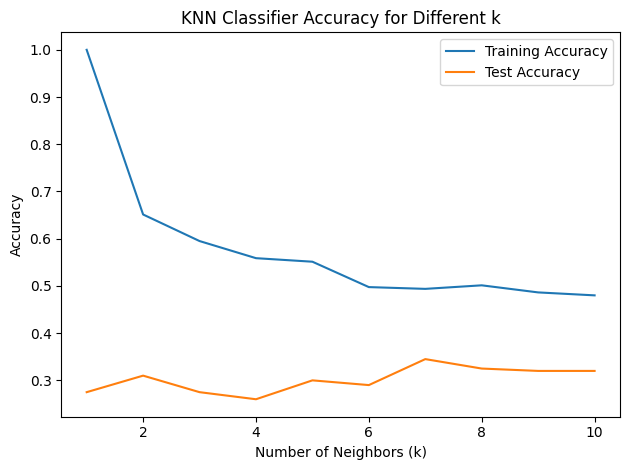

In [38]:
# Plot the accuracy values
plt.plot(k_values, train_accuracy, label='Training Accuracy')
plt.plot(k_values, test_accuracy, label='Test Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.legend()
plt.title('KNN Classifier Accuracy for Different k')
plt.tight_layout()
plt.show()

In [39]:
# Find the index of the highest test accuracy
best_k_index = np.argmax(test_accuracy)

# Get the corresponding value of k
best_k = k_values[best_k_index]

# Print the best k and its corresponding test accuracy
print(f"Best k: {best_k}")
print(f"Test accuracy with best k: {test_accuracy[best_k_index]}")


Best k: 7
Test accuracy with best k: 0.345
